In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Load data from csv for DataFrame 
df = pd.read_csv("Data/netflix_titles.csv")
# Remove all null data
df = df.dropna()

In [27]:
# assign variables
# Release year
df_release_year = df['release_year'];
# Country
df_country =  df['country'];
# Rating
df_rating = df['rating'];
# Duration
df_duration = df['duration'];
# Type
df_type = df['type'];

In [28]:
# Display Data Frame
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [29]:
# Create individual country Movies and TV Shows
def plot_country_movies_tv_shows(df_type):
    movies = df[df_type == 'Movie']
    tv_shows = df[df_type == 'TV Show']
    
    # calculate top 13 countries values for Movies and TV Shows
    movie_count = movies['country'].value_counts().head(13)
    tv_show_count = tv_shows['country'].value_counts().head(13)
   
    # Increase figure size
    plt.figure(dpi=144, figsize=(8, 6))
    
    movie_count.plot(kind='bar', color='green', position=0, width=0.4, label='Movies')
    tv_show_count.plot(kind='bar', color='red', position=1, width=0.4, label='TV Shows')
    
    # display total number of movies of each top 13 countries
    for i, count in enumerate(movie_count):
        plt.text(i + 0.0, count + 0.5, str(count), color='black', fontweight = 'bold', fontsize=12)
    
    # display total number of TV Shows of each top 13 countries
    for i, count in enumerate(tv_show_count):
        plt.text(i - 0.5, count + 0.1, str(count), color='black', fontweight = 'bold', fontsize=12)
    
    # Set labels and title of x axis and y axis
    plt.title('Top 13 Countries count of Movies & TV Shows on Netflix')
    plt.xlabel('Country')
    plt.ylabel('Number of Movies & TV Shows')
    plt.legend()
    #display graph
    plt.show()
    return

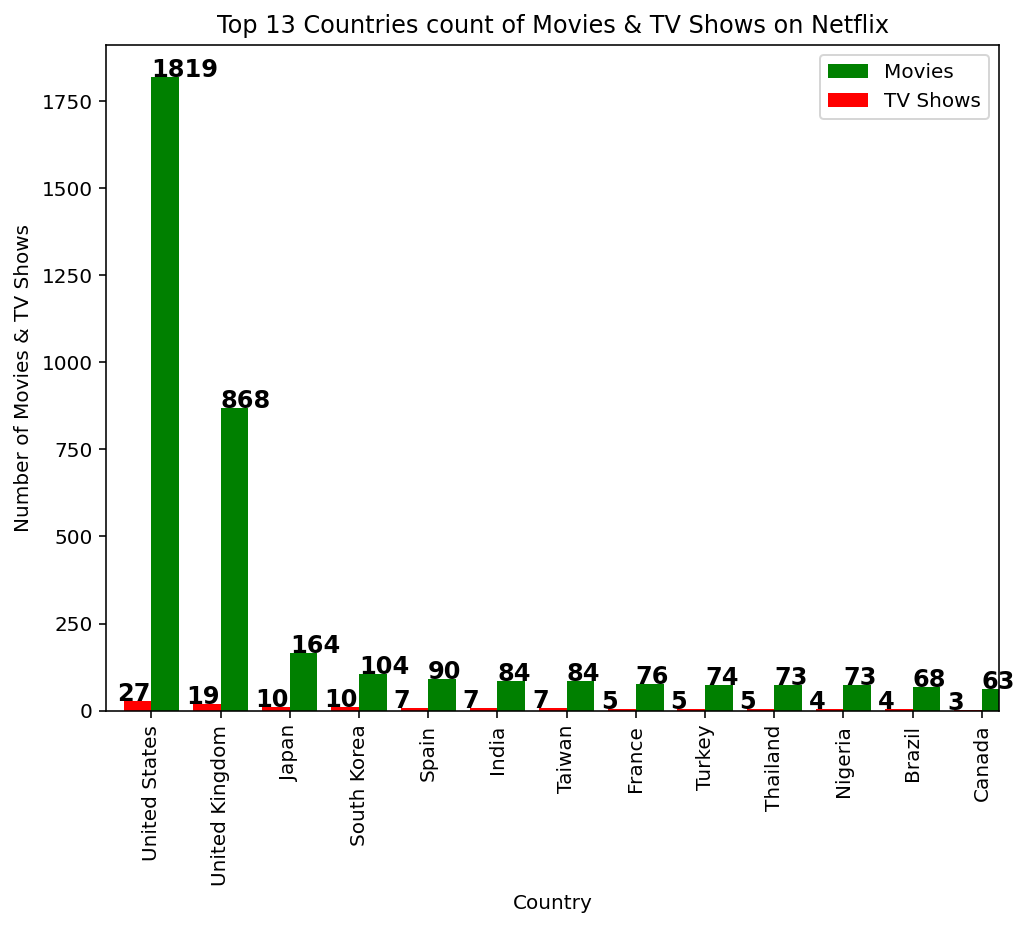

In [30]:
plot_country_movies_tv_shows(df_type)

In [31]:
# Rating of movies and Tv shows
def plot_rating_movies_tv_shows(df_rating):
    
    # Set a threshold value
    threshold = 0.01  
    top_rating = df_rating.value_counts(normalize=True)
    
    # Filter out values of threshold
    top_rating = top_rating[top_rating >= threshold]  
    
    # Increase figure size
    plt.figure(dpi=144, figsize=(10, 8))  
    top_rating.plot(kind='pie', autopct='%1.1f%%', startangle=140, fontsize=8)  # Adjust fontsize
    
    # Set labels and title of x axis and y axis
    plt.title('Ratings of Movies and TV Shows on Netflix')
    plt.xlabel('Rating')
    plt.ylabel('Ration')
    plt.axis('Equal')
    plt.legend()
    
    # Display graph
    plt.show()
    
    return

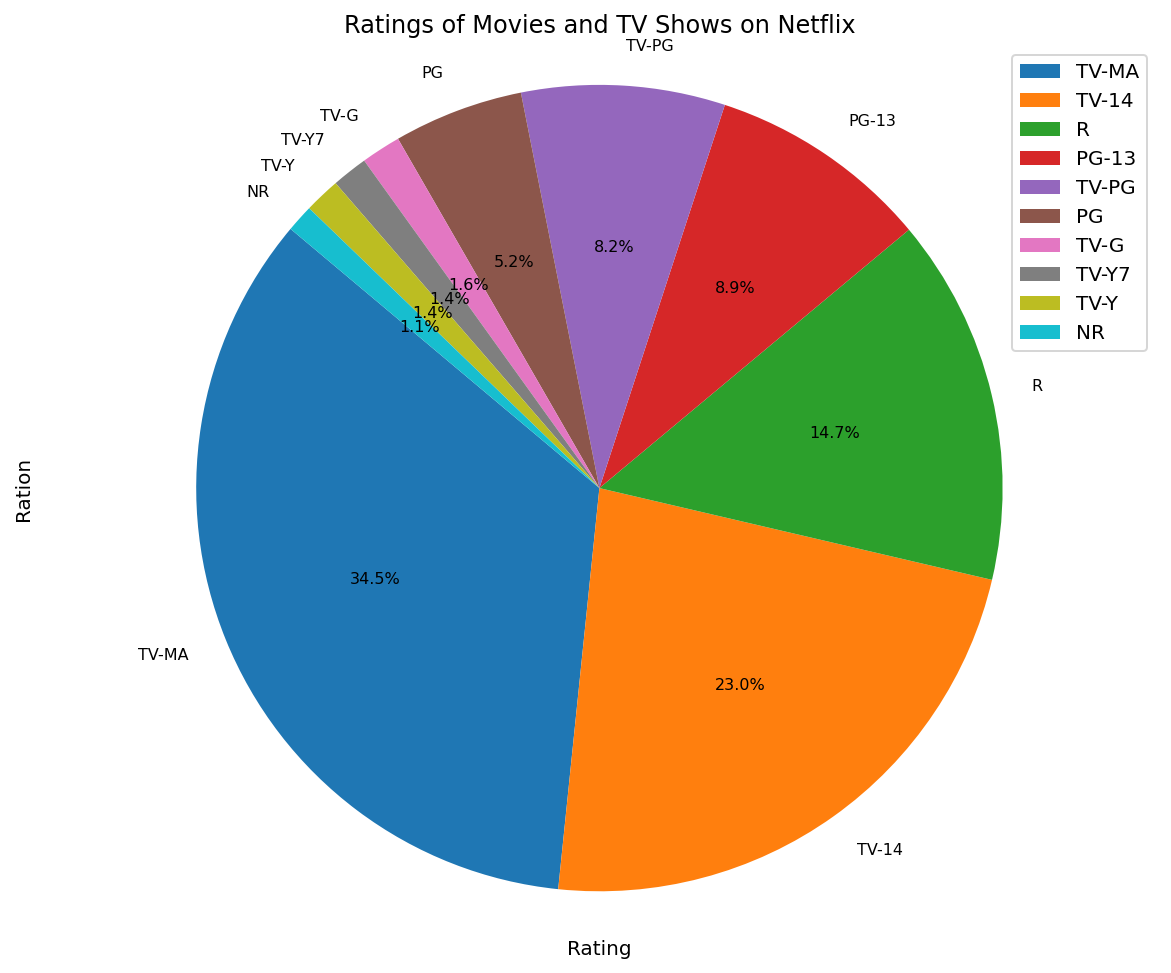

In [32]:
plot_rating_movies_tv_shows(df_rating)

In [33]:
# Number of Movies and TV shows release by every year
def plot_movies_tv_shows_release_year(df_release_year, df_type):
    
    movies = df[df_type == 'Movie']
    tv_shows = df[df_type == 'TV Show']
    
    # calculate values for Movies and TV Shows
    movie_count = movies['release_year'].value_counts().sort_index()
    tv_show_count = tv_shows['release_year'].value_counts().sort_index()
    
    # figure size of line graph
    plt.figure(dpi=144, figsize=(10, 8))
    
    # plot the line graph with color, markersize and label 
    movie_count.plot(kind='line', color='orange', marker='o', markersize=3, label='Movies')
    tv_show_count.plot(kind='line', color='blue', marker='o', markersize=3, label='TV Shows')
    
    # Each data point with its value
    for year, count in movie_count.items():
        plt.text(year, count, str(count), ha='center', va='bottom', fontweight='bold' ,fontsize=6)
    
    # Each data point with its value
    for year, count in tv_show_count.items():
        plt.text(year, count, str(count), ha='center', va='bottom', fontweight='bold', fontsize=6)
    
   
    plt.title('All Movies & TV shows released each year on Netflix')
    plt.xlabel('Years')
    plt.ylabel('Number of Movies & TV Shows')
    plt.legend()
    # display the graph
    plt.show()
    return

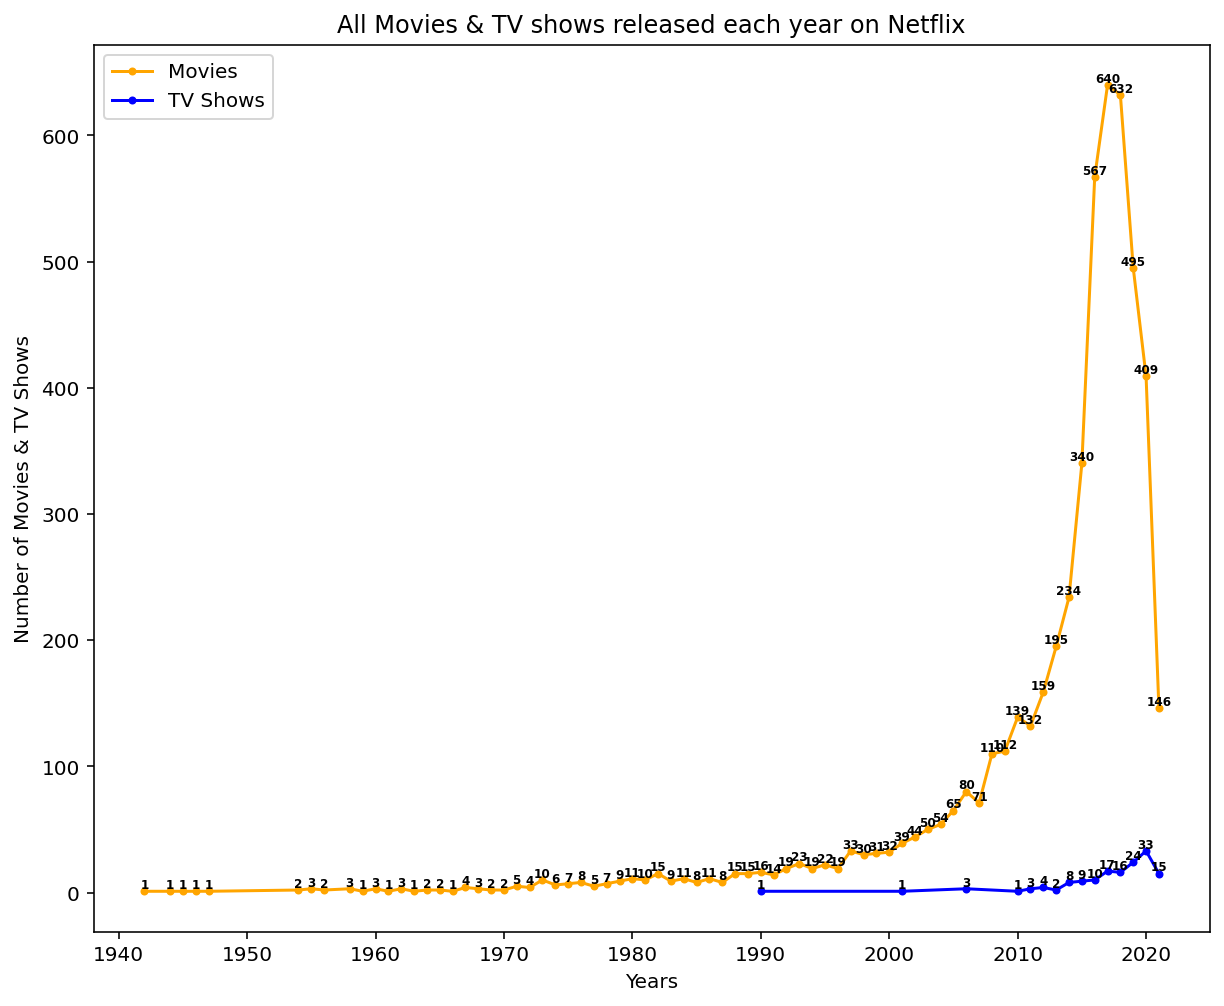

In [34]:
plot_movies_tv_shows_release_year(df_release_year, df_type)

In [35]:
def plot_movie_duration(df_duration):
    # Remove the text values from duration column
    df_duration = df_duration.str.replace(' min', '')
    
    df_duration = pd.to_numeric(df_duration, errors='coerce') 

    # Remove null values from duration column
    df_duration = df_duration.dropna()

    # figure size of Violin Plot
    plt.figure(dpi=144, figsize=(8, 6))
    
    colors = plt.violinplot(df_duration, vert=False)
    
    #set color on bodies  
    for color in colors['bodies']:
        color.set_facecolor('#D43F3A')
        color.set_edgecolor('black')
        color.set_alpha(1)
        
    plt.title('Movies Duration on Netflix')
    plt.xlabel('Movies Duration (minutes)')
    plt.ylabel('Range')
    # Display graph
    plt.show()
    return

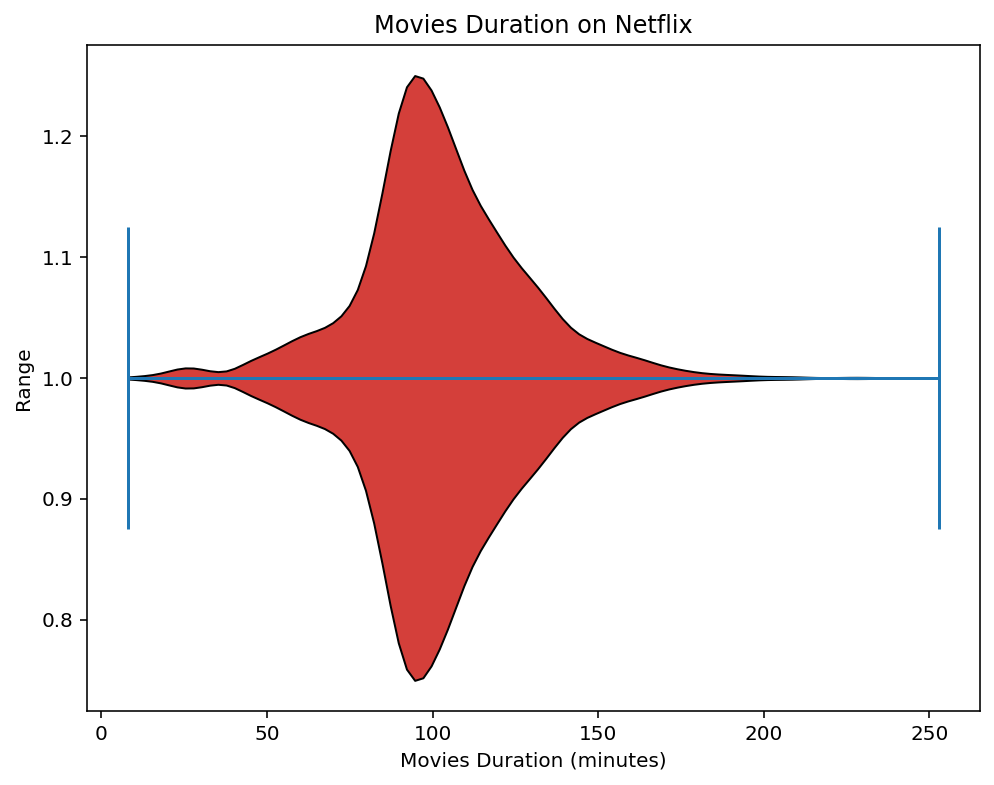

In [36]:
plot_movie_duration(df_duration)